<a href="https://colab.research.google.com/github/GutoMayer/machinelearningKNN/blob/main/C%C3%B3pia_de_MachineLearningEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importando bibliotecas e dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#vamos fazer algumas importanções que sempre fazemos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#importação da biiblioteca que contem o knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Verificando valores nulos, duplicados,alterando nome das colunas e observando a descrição do DF.

In [ ]:
df.isnull().sum() #verificando dados nulos

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [ ]:
duplicated = df.duplicated().any()
duplicated

False

In [ ]:
df.shape

(302, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 303 non-null    int64  
 1   sex                 303 non-null    int64  
 2   pain chest tp       303 non-null    int64  
 3   pressao repouso     303 non-null    int64  
 4   colesterol          303 non-null    int64  
 5   açucar em respouso  303 non-null    int64  
 6   eletro em rest      303 non-null    int64  
 7   max freq card       303 non-null    int64  
 8   angina pelo ex      303 non-null    int64  
 9   oldpeak             303 non-null    float64
 10  slp                 303 non-null    int64  
 11  caa                 303 non-null    int64  
 12  thall               303 non-null    int64  
 13  output              303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,pain chest tp,pressao repouso,colesterol,açucar em respouso,eletro em rest,max freq card,angina pelo ex,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df = df.rename(columns = {'cp': 'pain chest tp', 'trtbps': 'pressao repouso', 'chol': 'colesterol', 'fbs': 'açucar em respouso', 'restecg': 'eletro em rest', 'thalachh' :  'max freq card', 'exng': 'angina pelo ex'})

<Axes: >

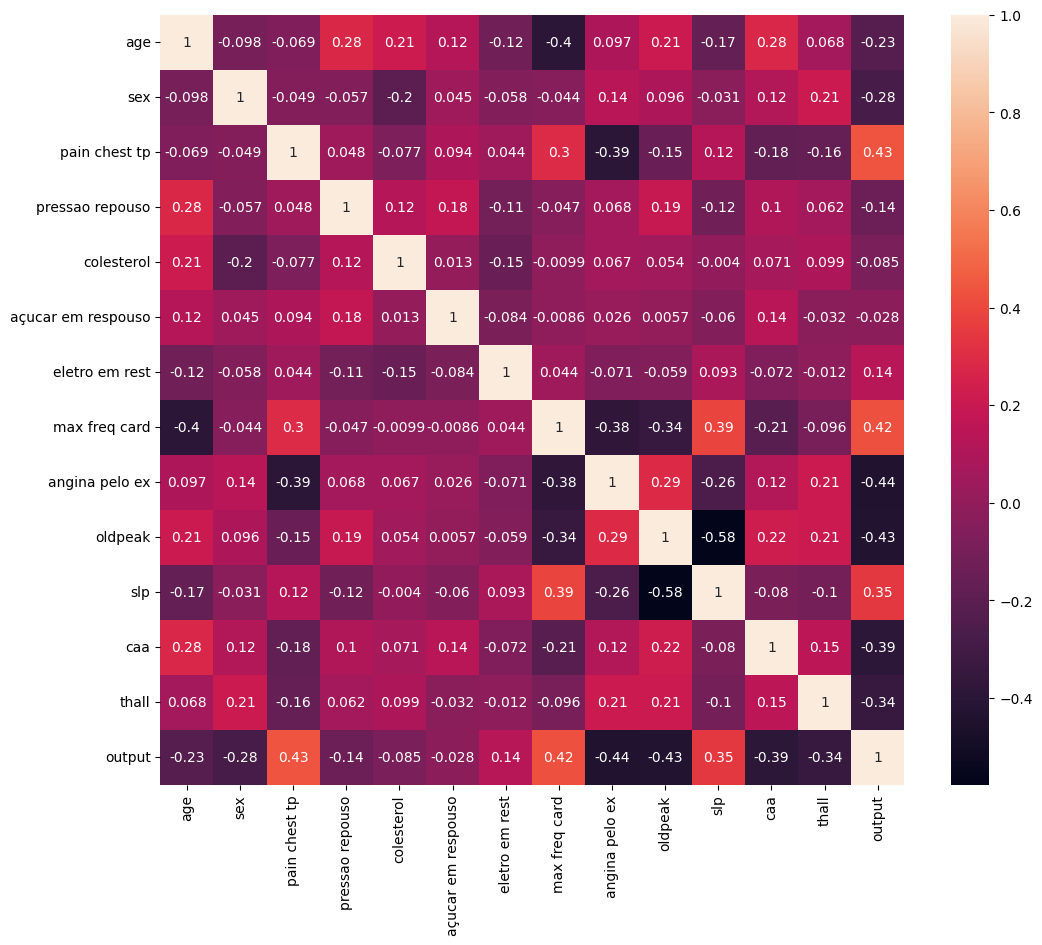

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(numeric_only=True), annot = True)

### CONSIDERAÇÕES SOBRE O DF:

No DF temos alguns outliers, então vamos tirar. Além disso, vamos plotar alguns gráficos, separar as variáveis entre numéricas e categórias e utilizar a função getdummies para que possamos treinar melhor nosso modelo

In [ ]:
df.head(2)

,age,sex,pain chest tp,pressao repouso,colesterol,açucar em respouso,eletro em rest,max freq card,angina pelo ex,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [ ]:
categoricas = df[['sex', 'pain chest tp', 'açucar em respouso', 'angina pelo ex', 'eletro em rest', 'slp', 'caa', 'thall']]
numericas = df[['age', 'pressao repouso', 'colesterol', 'max freq card', 'oldpeak']]

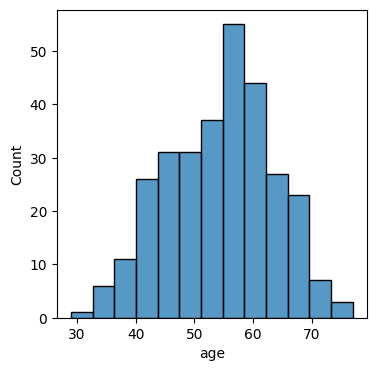

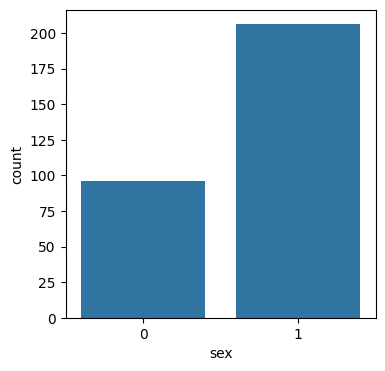

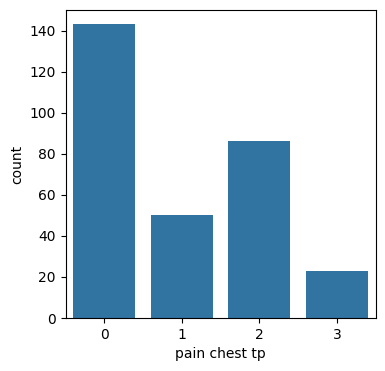

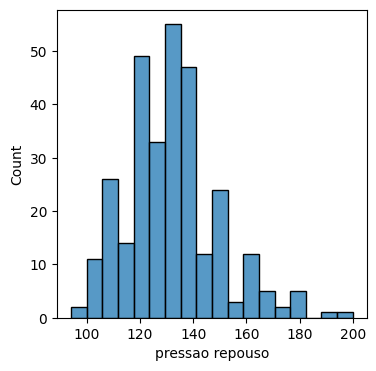

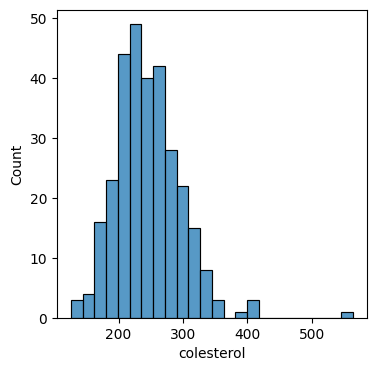

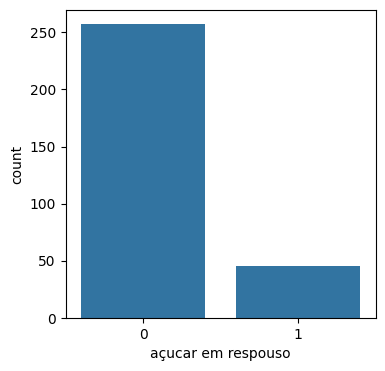

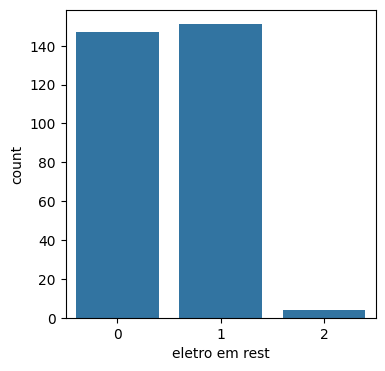

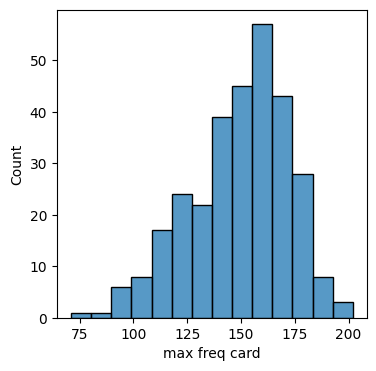

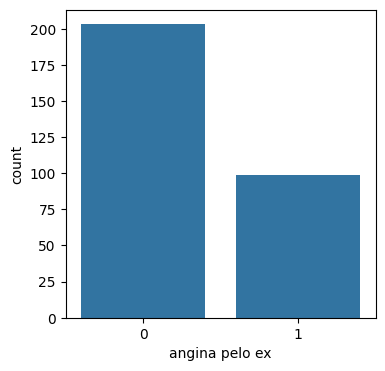

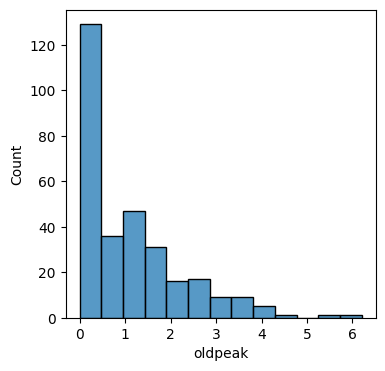

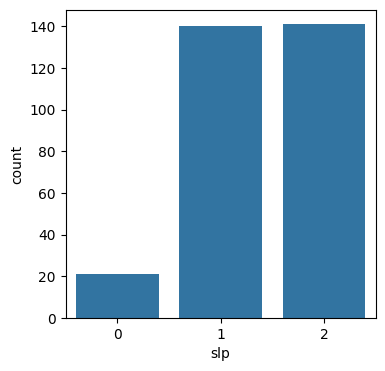

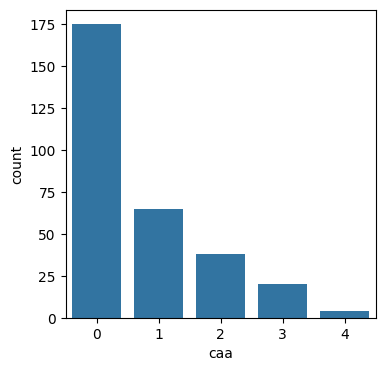

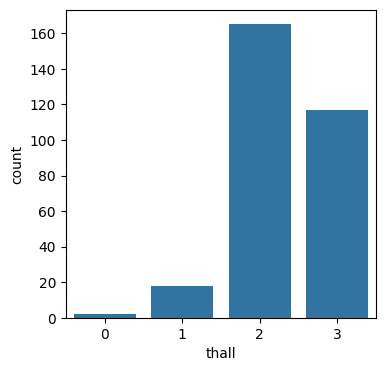

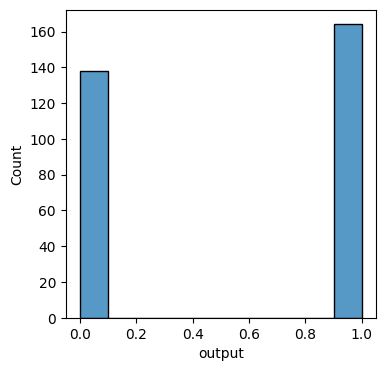

In [ ]:
for c in df.columns:
  if c in categoricas:
    plt.figure(figsize = (4,4))
    sns.countplot(x = c, data = df)
  else:
    plt.figure(figsize = (4,4))
    sns.histplot(x = c, data = df)


Numéricas: temos algumas features com outliers

Categoricas: vamos usar o getdummies para quebrar essas variaveis.

<Axes: >

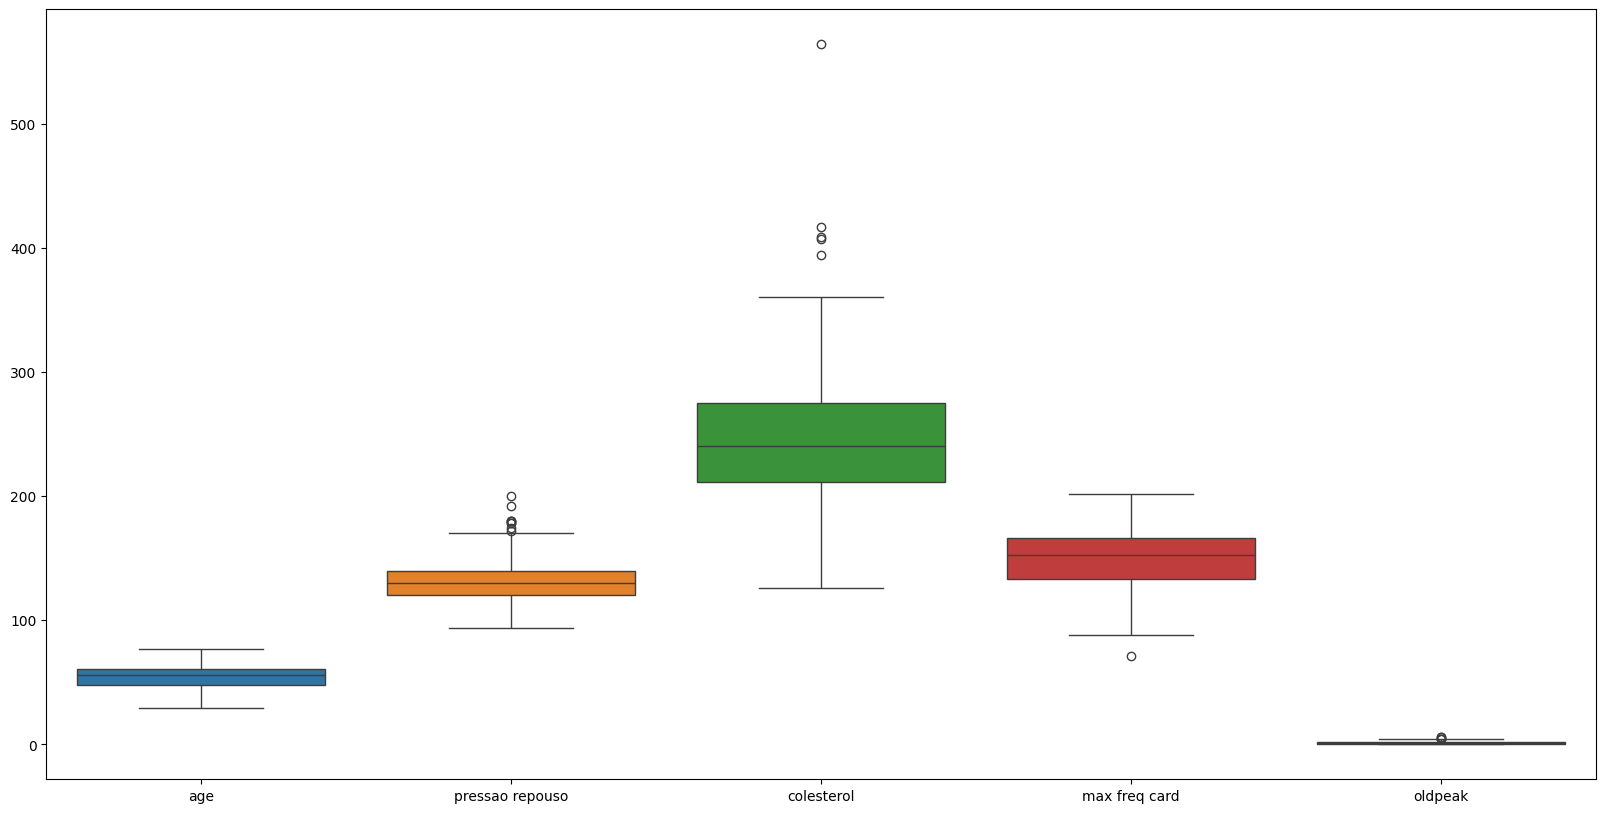

In [ ]:
  plt.figure(figsize = (20,10))
  sns.boxplot(data = numericas)

Ouliers vão ser eliminados no colesterol, pressao em repouso e max de frequencia cardiaca.

In [ ]:
df['pressao repouso'].quantile(0.95)

160.0

In [ ]:
df1 = df[df['pressao repouso'] < 180]
df1.describe()

,age,sex,pain chest tp,pressao repouso,colesterol,açucar em respouso,eletro em rest,max freq card,angina pelo ex,oldpeak,slp,caa,thall,output
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.336700,0.686869,0.969697,130.680135,245.609428,0.144781,0.525253,149.565657,0.319865,1.030303,1.400673,0.720539,2.309764,0.548822
std,9.071847,0.464550,1.034420,16.154304,51.645776,0.352474,0.520072,22.844729,0.467211,1.146686,0.613254,1.009758,0.613755,0.498451
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df['colesterol'].quantile(0.98)

353.98

In [ ]:
df2 = df1[df1['colesterol'] < 354]
df2.describe()

,age,sex,pain chest tp,pressao repouso,colesterol,açucar em respouso,eletro em rest,max freq card,angina pelo ex,oldpeak,slp,caa,thall,output
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,54.232082,0.699659,0.969283,131.034130,242.208191,0.146758,0.539249,149.317406,0.327645,1.024232,1.399317,0.709898,2.307167,0.542662
std,9.086008,0.459191,1.034877,16.831931,44.163314,0.354470,0.526030,23.048303,0.470158,1.149714,0.614549,1.004001,0.614758,0.499029
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.700000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,271.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,180.000000,353.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df['max freq card'].quantile(0.003)

86.351

In [ ]:
df3 = df2[df2['max freq card'] > 86]
df3.describe()

,age,sex,pain chest tp,pressao repouso,colesterol,açucar em respouso,eletro em rest,max freq card,angina pelo ex,oldpeak,slp,caa,thall,output
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,54.188356,0.698630,0.972603,131.071918,242.226027,0.147260,0.537671,149.585616,0.328767,1.024315,1.400685,0.712329,2.308219,0.544521
std,9.070673,0.459641,1.035090,16.848373,44.238074,0.354974,0.526238,22.625204,0.470572,1.151687,0.615158,1.004860,0.615550,0.498869
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.750000,0.000000,0.000000,132.750000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.500000,0.000000,1.000000,152.000000,0.000000,0.650000,1.000000,0.000000,2.000000,1.000000
75%,60.250000,1.000000,2.000000,140.000000,271.000000,0.000000,1.000000,166.250000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,180.000000,353.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

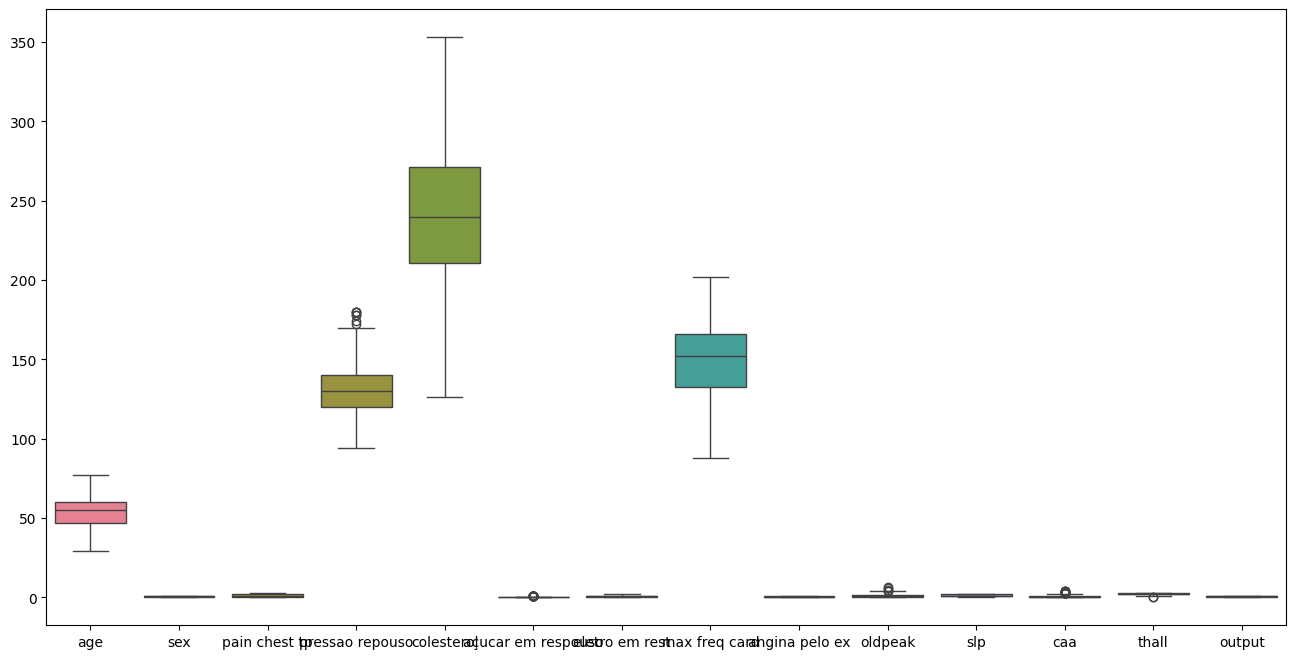

In [ ]:
plt.figure(figsize= (16,8))
sns.boxplot(data = df3)

In [ ]:
df4 = pd.get_dummies(df3, columns = ['sex', 'pain chest tp', 'açucar em respouso', 'angina pelo ex', 'eletro em rest', 'slp', 'caa', 'thall'])
df4.replace({False: 0, True: 1}, inplace = True)
df4

,age,pressao repouso,colesterol,max freq card,oldpeak,output,sex_0,sex_1,pain chest tp_0,pain chest tp_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
5,57,140,192,148,0.4,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


### Modelo de machine learning utilizando KNeighborsClassifier

In [ ]:
X = df4.drop('output', axis = 1)
y = df4['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier()

cv_scores = cross_val_score(knn, X_train, y_train, cv = 5)
print("Acuracia média: ")
print(cv_scores.mean())


Acuracia média: 
0.8264270613107823


Vamos verificar agora quaissão os melhores parametros para nossa função

In [ ]:
param_grid = {
    'n_neighbors' : list(range(1,31)),
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
    }

search = GridSearchCV(knn, param_grid, cv = 5, scoring = 'accuracy')
search.fit(X_train, y_train)
print("Melhores parametros:")
print(search.best_params_)

Melhores parametros:
{'metric': 'euclidean', 'n_neighbors': 21, 'weights': 'uniform'}


Modelo utilizando as melhores métricas:

In [ ]:
knn = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 21, weights = 'uniform')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.82        37
           1       0.79      0.86      0.83        36

    accuracy                           0.82        73
   macro avg       0.82      0.82      0.82        73
weighted avg       0.82      0.82      0.82        73

